In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import haversine as hs 
import pandas as pd

In [91]:
df = pd.read_csv("uber.csv")

In [92]:
df.head()
df.info() #To get the required information of the dataset
df.columns #TO get number of columns in the dataset
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required
df.head()
df.shape #To get the total (Rows,Columns)
df.dtypes #To get the type of each column
df.info()
df.describe() #To get statistics of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

In [93]:
print(df.isnull().sum())
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)
df.isnull().sum()
df.dtypes

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [94]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [95]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
day= df.pickup_datetime.dt.day,
month = df.pickup_datetime.dt.month,
year = df.pickup_datetime.dt.year,
dayofweek = df.pickup_datetime.dt.dayofweek)
df.head()
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column
df = df.drop('pickup_datetime',axis=1)
df.head()
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

1.6833250775073447
2.4575932783467835
5.036384146783453
1.661685753650294
4.1160881895779955
0.0
9.529776771411873
0.7719995370784762
2.332714231417754
4.889423641655177
2.2508607308770285
0.7719995370784762
0.3022521108558365
3.5812557740132496
1.3099517093917648
1.716279792276335
0.7299665570466272
2.515953547298386
1.790321726187665
1.0347050399795192
2.4902472008677727
0.9594701844599927
1.2613897673437817
1.7517650017211177
6.1932445014761095
2.736192584061414
0.7232537124105735
3.229443537425455
1.4295172964395384
2.233699311547041
11.081439278313375
1.8950491608266506
1.9049353402365328
3.1821178242889583
4.467427177611096
2.9230236888626995
1.200213842045202
2.635790807404098
2.253613903554444
9.186987668633932
4.826533532872274
1.2502926870845612
0.7984742276755328
0.840396152683202
0.38519924001701444
2.434346176233359
3.127909533264099
3.7346507724526368
0.0
4.504360509008704
1.5579008497303448
4.923160610490316
7.683158068167262
0.6855715417446852
4.523573083259081
4.071896

<AxesSubplot: >

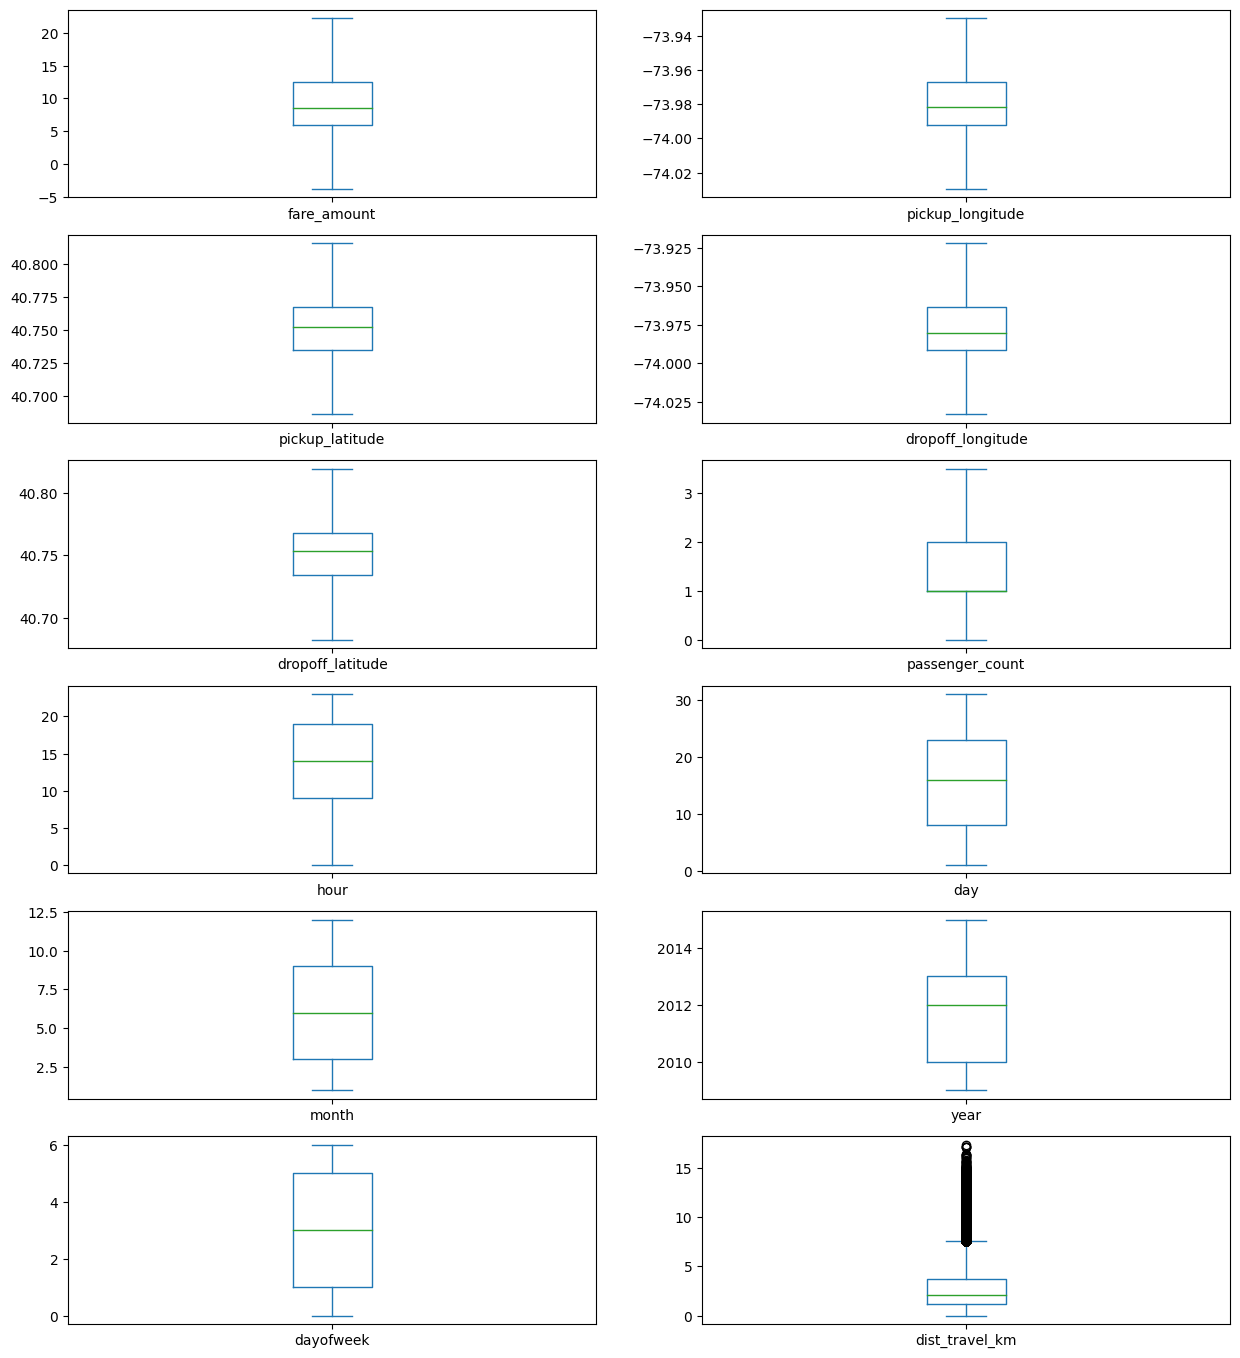

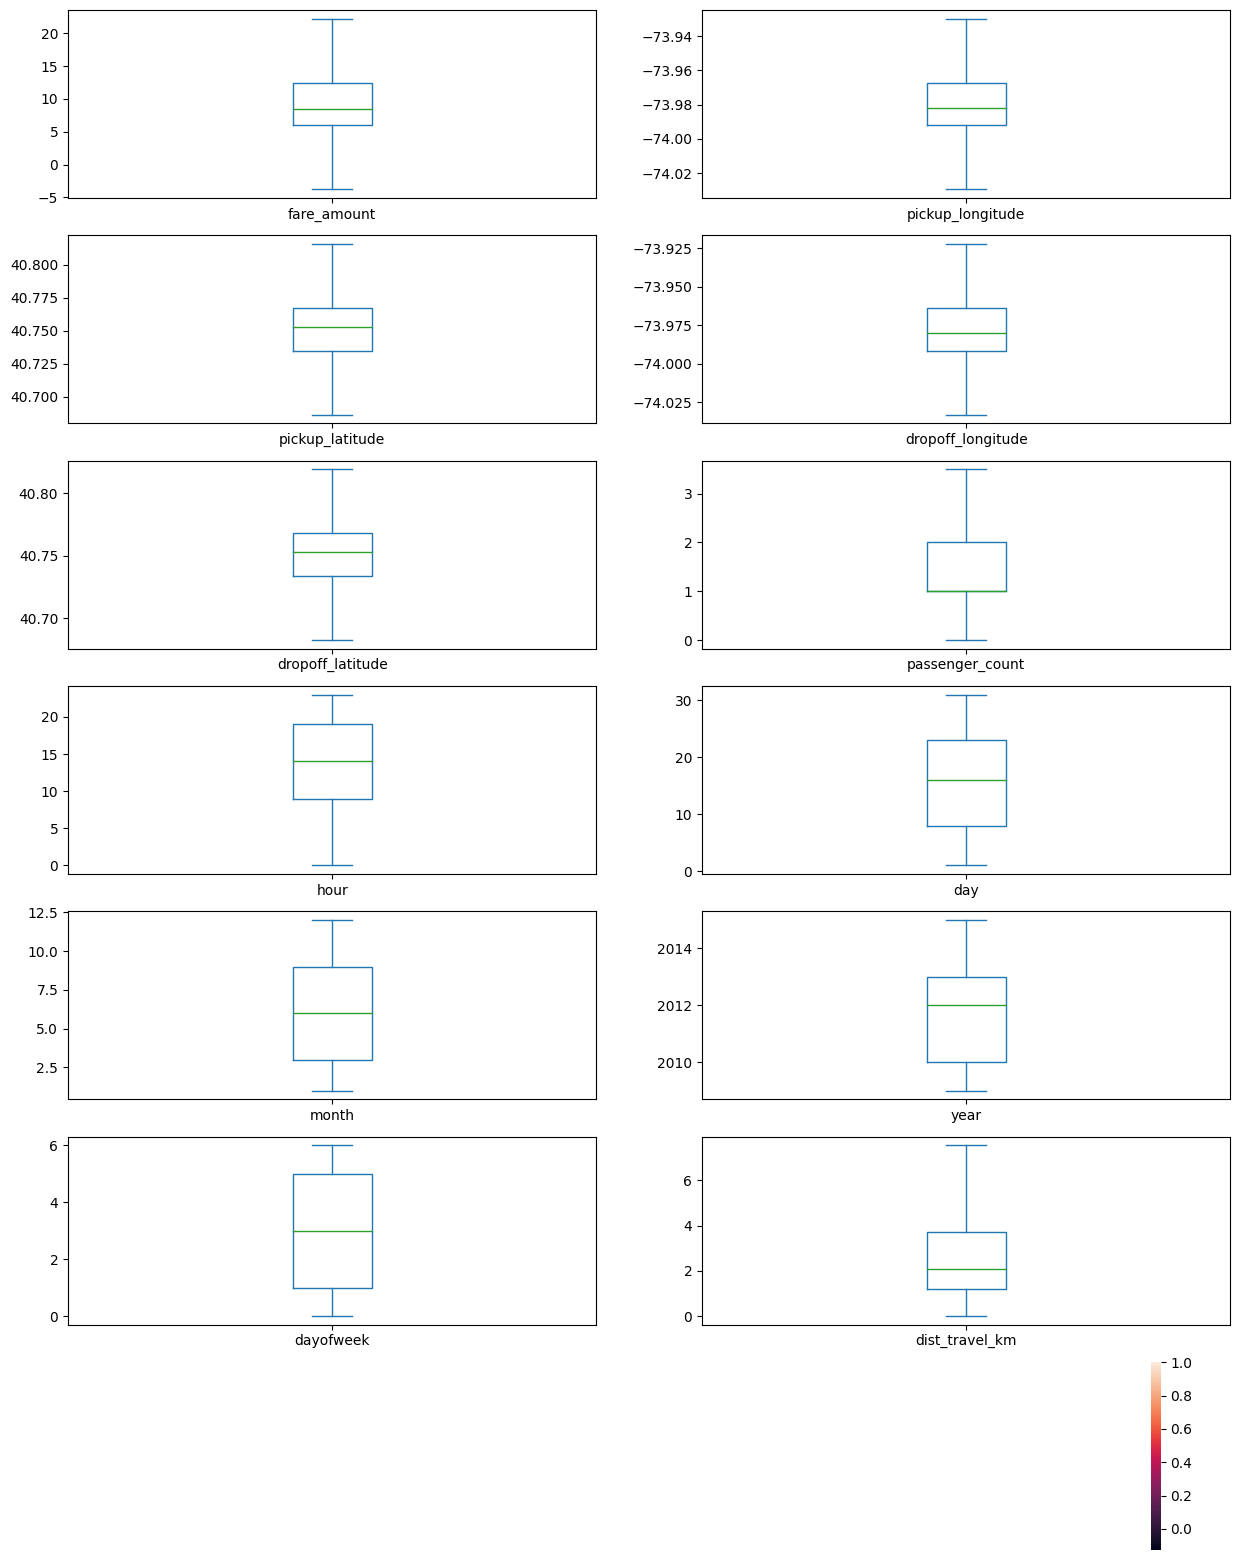

In [103]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
#Using the InterQuartile Range to fill the values
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
# Removing outliers.

df = treat_outliers_all(df , df.iloc[: , 0:])
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 


travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
    loc1=(lati1,long1)
    loc2=(lati2,long2)
    c = hs.haversine(loc1,loc2)
    print(c)
    travel_dist.append(c)
# print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

corr = df.corr() #Function to find the correlation
# corr
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(corr,annot = True) #Correlation Heatmap (Light values means highly correlated)

In [97]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [99]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
prediction = regression.predict(X_test) #To predict the target values
print(prediction)

[8.00846183 6.56868691 6.95612707 ... 9.0987564  4.91703442 9.83690765]


29791     8.9
86419     6.0
93959     6.0
191282    6.9
76947     6.9
         ... 
170230    6.1
176854    6.5
70619     7.0
120470    5.3
79935     9.5
Name: fare_amount, Length: 66000, dtype: float64

### r^2 = 1- (SSR/SST)
#### SSR : (predicted - actual)^2
#### SST : (predicted - mean)^2



In [100]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,prediction)
print(R2)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

0.6638756637670806
9.994198640813266
3.161360251665929


In [101]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10) #Here n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([9.463 , 5.8275, 5.913 , ..., 8.855 , 4.998 , 8.835 ])

In [102]:
print('Random Forest Performance')
R2_Random = r2_score(y_test,y_pred)
print(R2_Random)
MSE_Random = mean_squared_error(y_test,y_pred)
print(MSE_Random)
RMSE_Random = np.sqrt(MSE_Random)
print(RMSE_Random)

Random Forest Performance
0.7966256718203202
6.047058231633638
2.4590767030805765
